In [1]:
# Importation du jeu de donnees IMDB

from keras.datasets import imdb

(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words = 10000)

In [2]:
len(x_train)

25000

In [3]:
# Decodons les donnees
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in x_train[0]])

In [4]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
# Conception du modele 

from keras import layers, models

model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

C:\Users\Christian\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compilation du modele

from keras import optimizers, losses, metrics

model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.0001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [7]:
# Pretraitements des donnees

import numpy as np 

def vectorisation(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

xTrain = vectorisation(x_train)
xTest = vectorisation(x_test)

yTrain = np.asarray(y_train).astype("float32")
yTest = np.asarray(y_test).astype("float32")

In [8]:
# Ajoutons un ensemble de validation

x_val = xTrain[:10000]
y_val = yTrain[:10000]
x_part = xTrain[10000:]
y_part = yTrain[10000:]

In [9]:
# Compilation du modele 

history = model.fit(x_part, y_part, epochs = 20, batch_size = 256, validation_data = (x_val, y_val))

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - binary_accuracy: 0.5566 - loss: 0.6886 - val_binary_accuracy: 0.7056 - val_loss: 0.6589
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.7506 - loss: 0.6400 - val_binary_accuracy: 0.8006 - val_loss: 0.5949
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.8296 - loss: 0.5713 - val_binary_accuracy: 0.8320 - val_loss: 0.5352
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.8609 - loss: 0.5072 - val_binary_accuracy: 0.8491 - val_loss: 0.4834
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.8741 - loss: 0.4545 - val_binary_accuracy: 0.8586 - val_loss: 0.4413
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - binary_accuracy: 0.8847 - loss: 0.4080 - val_binary_accuracy: 0.8647 - val_loss: 0.4077
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.8920 - loss: 0.3730 - val_binary_accuracy: 0.8719 - val_loss: 0.3793
Epoch 8/20
59

In [10]:
# Evaluons le modele sur les donnees d'entrainement

Perte, Precision = model.evaluate(xTest, yTest)
print("la precision est ",Precision,"et la perte est",Perte)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8823 - loss: 0.2878
la precision est  0.8848000168800354 et la perte est 0.28606846928596497


In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

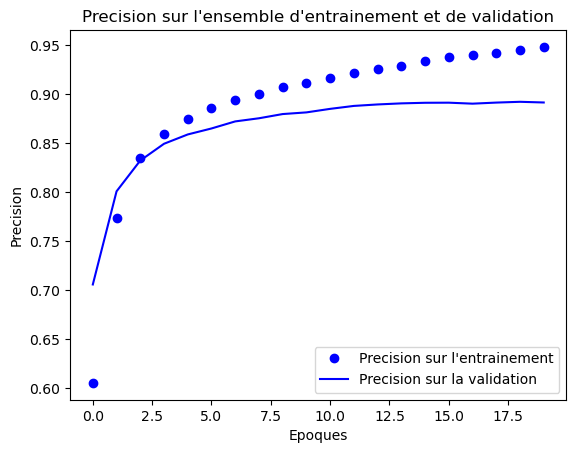

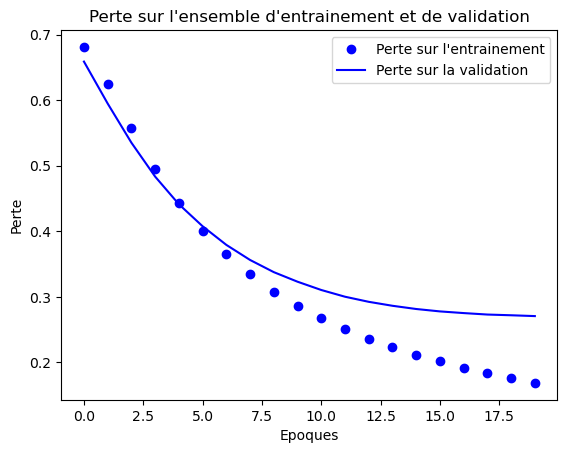

In [12]:
# Affichons les graphiques de Precision et de Perte

import matplotlib.pyplot as plt
precision = history_dict["binary_accuracy"]
perte = history_dict["loss"]
precision_val = history_dict["val_binary_accuracy"]
perte_val = history_dict["val_loss"]

epochs = range(1, + len(perte) + 1)
plt.plot(precision, "bo", label = "Precision sur l'entrainement")
plt.plot(precision_val, "b", label = "Precision sur la validation")
plt.title("Precision sur l'ensemble d'entrainement et de validation")
plt.xlabel("Epoques")
plt.ylabel("Precision")
plt.legend()
plt.show()

epochs = range(1, + len(perte) + 1)
plt.plot(perte, "bo", label = "Perte sur l'entrainement")
plt.plot(perte_val, "b", label = "Perte sur la validation")
plt.title("Perte sur l'ensemble d'entrainement et de validation")
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.legend()
plt.show()